In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
url = "https://raw.githubusercontent.com/sergioyahni/datasets/main/mpd2020-full-data.csv"
df = pd.read_csv(url, encoding='latin-1')

In [3]:
df.dtypes

countrycode    object
country        object
year            int64
gdppc          object
pop            object
dtype: object

In [4]:
world = df[df["year"] > 1945].reset_index(drop=True)

In [5]:
# convert year column to datetime 
world["year"] = pd.to_datetime(world['year'], format='%Y')

In [6]:
# convert gdppc and pop to float 
gdppc_list = world["gdppc"].to_list()
pop_list = world["pop"].to_list()
gdp_pc = [float(str(item).replace(',', '')) for item in gdppc_list]
population = [float(str(item).replace(',', '')) for item in pop_list]

In [7]:
# Add float values to world dataset as new columns
# Add new gdp culumn 
#  delete old string values

world['gdp_pc'] = gdp_pc
world['population'] = population
world["gdp"] = world["gdp_pc"] * world["population"] * 1000
world = world.drop(['gdppc', 'pop'], axis=1)

In [8]:
world.head(15)

,countrycode,country,year,gdp_pc,population,gdp
0,AFG,Afghanistan,1950-01-01,1156.0,8150.0,9.421400e+09
1,AFG,Afghanistan,1951-01-01,1170.0,8284.0,9.692280e+09
2,AFG,Afghanistan,1952-01-01,1189.0,8425.0,1.001732e+10
3,AFG,Afghanistan,1953-01-01,1240.0,8573.0,1.063052e+10
4,AFG,Afghanistan,1954-01-01,1245.0,8728.0,1.086636e+10
5,AFG,Afghanistan,1955-01-01,1246.0,8891.0,1.107819e+10
6,AFG,Afghanistan,1956-01-01,1278.0,9062.0,1.158124e+10
7,AFG,Afghanistan,1957-01-01,1253.0,9241.0,1.157897e+10
8,AFG,Afghanistan,1958-01-01,1298.0,9429.0,1.223884e+10
9,AFG,Afghanistan,1959-01-01,1307.0,9625.0,1.257988e+10


In [9]:
argentina = world[world["countrycode"] == 'ARG'].reset_index(drop=True)

In [10]:
argentina.head(15)

,countrycode,country,year,gdp_pc,population,gdp
0,ARG,Argentina,1946-01-01,7436.0,15654.0,1.164031e+11
1,ARG,Argentina,1947-01-01,8112.0,15942.0,1.293215e+11
2,ARG,Argentina,1948-01-01,8372.0,16307.0,1.365222e+11
3,ARG,Argentina,1949-01-01,8045.0,16737.0,1.346492e+11
4,ARG,Argentina,1950-01-01,7949.0,17150.0,1.363254e+11
5,ARG,Argentina,1951-01-01,8086.0,17517.0,1.416425e+11
6,ARG,Argentina,1952-01-01,7519.0,17877.0,1.344172e+11
7,ARG,Argentina,1953-01-01,7769.0,18231.0,1.416366e+11
8,ARG,Argentina,1954-01-01,7938.0,18581.0,1.474960e+11
9,ARG,Argentina,1955-01-01,8348.0,18928.0,1.580109e+11


In [11]:
year_index = world['year'].unique()

In [12]:
# Calculate mean world gdp per year
mean_gdp = list()
total_gdp = list()
for year in year_index: 
    y = world[world["year"] == year]
    mean_gdp.append(y["gdp"].mean())
    total_gdp.append(y["gdp"].sum())
wmgdp = {"year": year_index, "world_gdp": total_gdp,"mean_gdp": mean_gdp}
comparative_mean_gdp = pd.DataFrame(wmgdp)
comparative_mean_gdp["argentina_gdp"] = argentina["gdp"]
comparative_mean_gdp["argentina_rate"] = (comparative_mean_gdp["argentina_gdp"] / comparative_mean_gdp["world_gdp"]) * 100
comparative_mean_gdp = comparative_mean_gdp.sort_values(by=['year']).reset_index()

In [13]:
comparative_mean_gdp.head(10)

,index,year,world_gdp,mean_gdp,argentina_gdp,argentina_rate
0,69,1946-01-01,5.757365e+12,1.174972e+11,8.478494e+11,14.726346
1,70,1947-01-01,5.906901e+12,1.158216e+11,8.283671e+11,14.023719
2,71,1948-01-01,6.473112e+12,1.221342e+11,8.504891e+11,13.138798
3,72,1949-01-01,6.817367e+12,1.262475e+11,8.293604e+11,12.165406
4,0,1950-01-01,8.412580e+12,5.801779e+10,1.164031e+11,1.383679
5,1,1951-01-01,8.961550e+12,6.180380e+10,1.293215e+11,1.443071
6,2,1952-01-01,9.424774e+12,6.241572e+10,1.365222e+11,1.448546
7,3,1953-01-01,9.949659e+12,6.589178e+10,1.346492e+11,1.353304
8,4,1954-01-01,1.021535e+13,6.765133e+10,1.363254e+11,1.334515
9,5,1955-01-01,1.090091e+13,7.219143e+10,1.416425e+11,1.299364


In [15]:
data = comparative_mean_gdp[["year", "mean_gdp", "argentina_gdp"]].copy()

<AxesSubplot:>

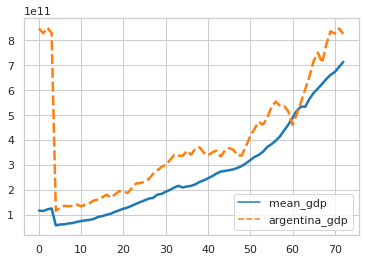

In [27]:
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

<AxesSubplot:ylabel='argentina_rate'>

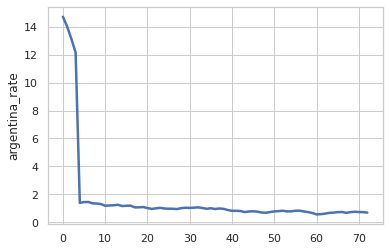

In [28]:
sns.lineplot(data=comparative_mean_gdp["argentina_rate"], palette="tab10", linewidth=2.5)